In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("ml_data.csv")

In [4]:
df.nunique()

Name                  77
Difficulty_Level       3
Trainers               6
Trainer_Experience     6
Total_Hours           18
Total_Trainee         25
dtype: int64

In [5]:
df.columns

Index(['Name', 'Difficulty_Level', 'Trainers', 'Trainer_Experience',
       'Total_Hours', 'Total_Trainee'],
      dtype='object')

# Label Encoding

In [60]:
# Define the encoding dictionary
encoding_dict = {
    'basic': 0,
    'medium': 1,
    'hard': 2
}

# Apply the encoding using map
df["Difficulty_Level_Encoded"] = df["Difficulty_Level"].map(encoding_dict)

# Drop the original "Difficulty_Level" column
df.drop(columns=["Difficulty_Level"], inplace=True)

# Display the encoded DataFrame
print(df)

                   Name  Trainers  Trainer_Experience  Total_Hours  \
0         Data Analysis       1.0                 2.0          3.0   
1         Cybersecurity       1.0                 2.0          4.0   
2     Technical Writing       1.0                 3.0          3.0   
3       Troubleshooting       1.0                 3.0          4.0   
4       Troubleshooting       2.0                 4.0          3.0   
...                 ...       ...                 ...          ...   
1395         Kubernetes       6.0                 3.0         19.0   
1396        Wireframing       6.0                 1.0         17.0   
1397   Containerization       5.0                 6.0         10.0   
1398   Machine Learning       6.0                 2.0         10.0   
1399             Python       5.0                 1.0         12.0   

      Total_Trainee  Difficulty_Level_Encoded  
0               9.0                         0  
1              18.0                         0  
2              

In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df['Name'] = label_encoder.fit_transform(df['Name'])


# Correlation Matrix

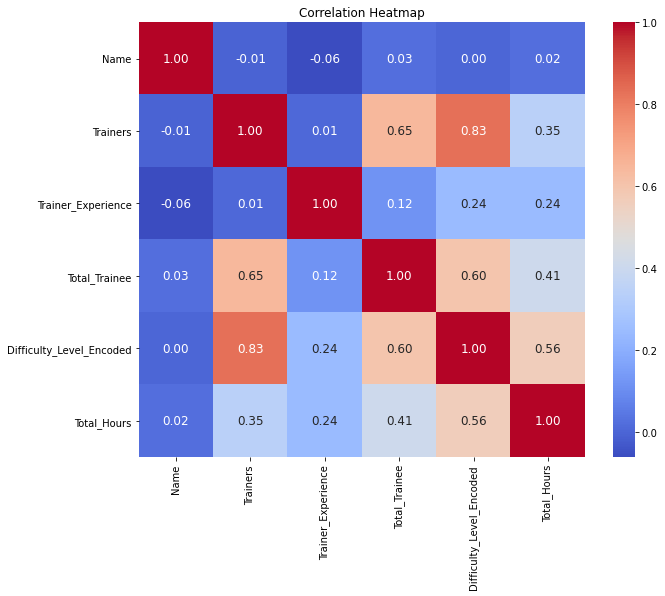

In [62]:
# Define the selected columns
selected_cols = ['Name', 'Trainers', 'Trainer_Experience', 'Total_Trainee', 'Difficulty_Level_Encoded', 'Total_Hours']

# Create a new DataFrame with selected columns
df_selected = df[selected_cols]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})

# Set title and display the plot
plt.title("Correlation Heatmap")
plt.show()


## Visualization of features

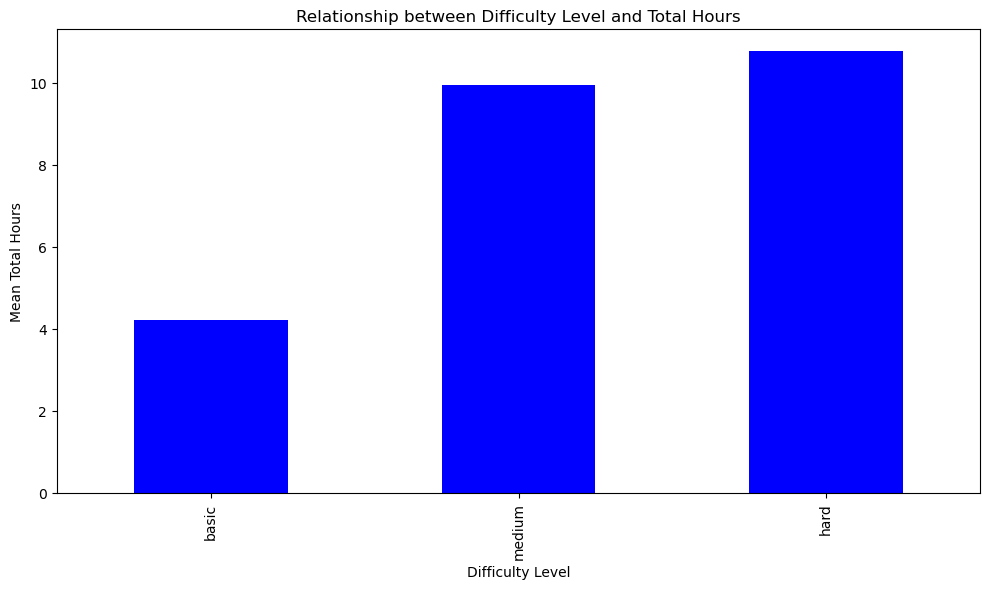

In [6]:
# Calculate the mean total hours for each difficulty level
mean_hours = df.groupby('Difficulty_Level')['Total_Hours'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_hours.plot(kind='bar', color='blue')

# Set labels and title
plt.xlabel('Difficulty Level')
plt.ylabel('Mean Total Hours')
plt.title('Relationship between Difficulty Level and Total Hours')

# Show plot
plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Assume df1 is your preprocessed DataFrame with features and target column 'SCOREACHIEVEDINQUIZ'

# Separate features and target variable
X = df[['Name', 'Trainers', 'Trainer_Experience','Total_Trainee', 'Difficulty_Level_Encoded']]
y = df['Total_Hours']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network (MLPRegressor)': MLPRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")

# You can also perform cross-validation to get more reliable estimates of model performance
for name, model in models.items():
    scores = cross_val_score(model, X_imputed, y, cv=5, scoring='neg_mean_squared_error')
    mse_mean = -scores.mean()
    print(f"{name}: Cross-validated Mean Squared Error = {mse_mean}")


Linear Regression: Mean Squared Error = 11.111559151915
Random Forest Regressor: Mean Squared Error = 13.442173449145612
Gradient Boosting Regressor: Mean Squared Error = 11.15729084695809
Support Vector Regressor: Mean Squared Error = 15.508059125799628


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network (MLPRegressor): Mean Squared Error = 11.585886420529595
Linear Regression: Cross-validated Mean Squared Error = 18.656550630757728
Random Forest Regressor: Cross-validated Mean Squared Error = 26.040581515667668
Gradient Boosting Regressor: Cross-validated Mean Squared Error = 24.025365382018983
Support Vector Regressor: Cross-validated Mean Squared Error = 20.885337747943556


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network (MLPRegressor): Cross-validated Mean Squared Error = 18.776503586503605


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


# Separate features and target variable
X = df[['Name', 'Trainers', 'Trainer_Experience','Total_Trainee', 'Difficulty_Level_Encoded']]
y = df['Total_Hours']

# Encode categorical variables
X_encoded = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

threshold = 2

# Convert regression predictions to binary classification labels
y_pred_binary = (y_pred <= threshold).astype(int)
y_test_binary = (y_test <= threshold).astype(int)

# Calculate accuracy for binary classification
accuracy = (y_pred_binary == y_test_binary).mean()

print(f"Accuracy: {accuracy*100} %")


Mean Squared Error: 11.111559151915
Accuracy: 86.78571428571429 %


In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Define dummy values for features
dummy_data={
    'Name': ['Python'],
    'Trainers': [1],
    'Trainer_Experience': [4],
    'Total_Trainee': [200],
    'Difficulty_Level_Encoded': [1]
}
    

# Create DataFrame with dummy values
dummy_df = pd.DataFrame(dummy_data)

# Get the list of feature names used during training
training_feature_names = X_imputed.columns.tolist()

# Ensure that the dummy DataFrame has the same columns as training data
dummy_df = pd.get_dummies(dummy_df)
dummy_df = dummy_df.reindex(columns=training_feature_names, fill_value=0)

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
dummy_imputed = pd.DataFrame(imputer.fit_transform(dummy_df), columns=dummy_df.columns)

# Make prediction
prediction = linear_regressor.predict(dummy_imputed)

# Print prediction
print("Predicted Completion Time:", int(prediction[0]) ,'hrs')


Predicted Completion Time: 10 hrs
